<a href="https://colab.research.google.com/github/ShashankS1ngh/ML/blob/main/DDBD_AirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [119]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

file_name = list(uploaded.keys())[0]

df = pd.read_excel(file_name)

df.head()

Saving cleaned_data_BnB.xlsx to cleaned_data_BnB (1).xlsx


,id,listing_url,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,review_duration_days,host_response_time_num,cancellation_policy_num
0,241032,https://www.airbnb.com/rooms/241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,...,10.0,10.0,10.0,9.0,10.0,0,moderate,1523,3,2
1,953595,https://www.airbnb.com/rooms/953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",...,10.0,10.0,10.0,10.0,10.0,0,strict,862,4,1
2,3308979,https://www.airbnb.com/rooms/3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,...,10.0,10.0,10.0,10.0,10.0,0,strict,400,3,1
3,7421966,https://www.airbnb.com/rooms/7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,flexible,0,0,3
4,278830,https://www.airbnb.com/rooms/278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,...,9.0,10.0,10.0,9.0,9.0,0,strict,1201,4,1


In [121]:
dataset = pd.read_excel('cleaned_data_BnB.xlsx')

In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           3818 non-null   int64         
 1   listing_url                  3818 non-null   object        
 2   name                         3818 non-null   object        
 3   summary                      3639 non-null   object        
 4   space                        3249 non-null   object        
 5   description                  3818 non-null   object        
 6   experiences_offered          3818 non-null   object        
 7   neighborhood_overview        2786 non-null   object        
 8   notes                        2206 non-null   object        
 9   transit                      2882 non-null   object        
 10  thumbnail_url                3498 non-null   object        
 11  medium_url                   3498 non-null 

In [123]:
dataset.describe().T

,count,mean,min,25%,50%,75%,max,std
id,3818.0,5550111.418544,3335.0,3258256.25,6118244.5,8035126.75,10340165.0,2962660.47856
host_id,3818.0,15785555.107648,4193.0,3275204.0,10558142.0,25903093.25,53208610.0,14583815.274694
host_since,3818,2013-09-18 18:29:59.057097984,2008-11-10 00:00:00,2012-08-17 00:00:00,2013-12-12 12:00:00,2015-01-14 00:00:00,2016-01-03 00:00:00,NaN
host_response_rate,3295.0,0.948868,0.17,0.98,1.0,1.0,1.0,0.118667
host_acceptance_rate,3818.0,0.797276,0.0,1.0,1.0,1.0,1.0,0.402081
host_is_superhost,3818.0,0.203772,0.0,0.0,0.0,0.0,1.0,0.402854
host_listings_count,3818.0,7.154531,1.0,1.0,1.0,3.0,502.0,28.620995
host_total_listings_count,3818.0,7.154531,1.0,1.0,1.0,3.0,502.0,28.620995
host_has_profile_pic,3818.0,0.997643,0.0,1.0,1.0,1.0,1.0,0.048501
host_identity_verified,3818.0,0.784966,0.0,1.0,1.0,1.0,1.0,0.4109


In [124]:
dataset.isnull().sum()

,0
id,0
listing_url,0
name,0
summary,179
space,569
...,...
instant_bookable,0
cancellation_policy,0
review_duration_days,0
host_response_time_num,0


In [125]:
df=dataset

In [126]:
df_miss = pd.DataFrame((df.isnull().sum())*100/len(df), columns=['Missing Values'])
df_miss[df_miss['Missing Values']>75]


,Missing Values


In [127]:
df_miss[df_miss['Missing Values']>45]


,Missing Values


In [128]:
df_miss[df_miss['Missing Values']>20]

,Missing Values
neighborhood_overview,27.029859
notes,42.221058
transit,24.515453
host_about,22.498690


In [ ]:
df["host_acceptance_rate"].fillna('0', inplace = True)

In [129]:
df_miss[(df_miss['Missing Values']>10)]

,Missing Values
space,14.903091
neighborhood_overview,27.029859
notes,42.221058
transit,24.515453
host_about,22.498690
host_response_time,13.698271
host_response_rate,13.698271
first_review,16.422211
last_review,16.422211
review_scores_rating,16.946045


In [130]:
# Define mappings
response_time_mapping = {
    "within an hour": 4,
    "within a few hours": 3,
    "within a day": 2,
    "a few days or more": 1
}

cancellation_policy_mapping = {
    "flexible": 3,
    "moderate": 2,
    "strict": 1,
    "super_strict_30": 0.5,
    "super_strict_60": 0.25
}

# Apply mappings and fill NaN with 0
df["host_response_time_num"] = df["host_response_time"].map(response_time_mapping).fillna(0)
df["cancellation_policy_num"] = df["cancellation_policy"].map(cancellation_policy_mapping).fillna(0)

# Display updated columns
print(df[["host_response_time", "host_response_time_num", "cancellation_policy", "cancellation_policy_num"]].head())


   host_response_time  host_response_time_num cancellation_policy  \
0  within a few hours                     3.0            moderate   
1      within an hour                     4.0              strict   
2  within a few hours                     3.0              strict   
3                 NaN                     0.0            flexible   
4      within an hour                     4.0              strict   

   cancellation_policy_num  
0                      2.0  
1                      1.0  
2                      1.0  
3                      3.0  
4                      1.0  


In [ ]:
#df_miss = pd.DataFrame((df.isnull().sum())*100/len(df), columns=['Missing Values'])

In [ ]:
#df_miss[(df_miss['Missing Values']>0)]

In [ ]:
#df = df.drop(['monthly_price'],axis=1) #,['weekly_price'],['security_deposit']
#df = df.drop(['weekly_price'],axis=1)
#df = df.drop(['security_deposit'],axis=1)

In [ ]:
#num_cols = [ "host_since", "host_listings_count", "host_total_listings_count", "bathrooms", "bedrooms", "beds"]
#df[num_cols] = df[num_cols].fillna(df[num_cols].median())

#print(df[num_cols].isnull().sum())

In [ ]:
df.to_excel("cleaned_data_BnB.xlsx", index=False)

In [131]:
  df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)

In [132]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns to encode
cat_cols = ["room_type", "property_type"]

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Categorical variables converted successfully!")

Categorical variables converted successfully!


In [133]:
from sklearn.model_selection import train_test_split

# Define independent (X) and dependent (y) variables
X = df.drop(columns=["price"])
y = df["price"]

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training size: {X_train.shape}, Test size: {X_test.shape}")

Training size: (3054, 85), Test size: (764, 85)


In [134]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3054 entries, 700 to 3174
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             3054 non-null   int64         
 1   listing_url                    3054 non-null   object        
 2   name                           3054 non-null   object        
 3   summary                        2914 non-null   object        
 4   space                          2588 non-null   object        
 5   description                    3054 non-null   object        
 6   experiences_offered            3054 non-null   object        
 7   neighborhood_overview          2225 non-null   object        
 8   notes                          1749 non-null   object        
 9   transit                        2308 non-null   object        
 10  thumbnail_url                  2802 non-null   object        
 11  medium_url          

In [135]:
if 'host_acceptance_rate' in df.columns:
    df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(str).str.replace('%', '', regex=False)
    df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'], errors='coerce')

# Ensure 'host_response_rate' is treated as a string before replacing '%'
if 'host_response_rate' in df.columns:
    df['host_response_rate'] = df['host_response_rate'].astype(str).str.replace('%', '', regex=False)
    df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')

# Handle missing values (replace NaNs with median for numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Convert categorical columns with one-hot encoding
categorical_cols = ['host_response_time', 'cancellation_policy']  # Add more if needed
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

if existing_categorical_cols:  # Apply only if valid columns exist
    df = pd.get_dummies(df, columns=existing_categorical_cols, drop_first=True)
else:
    print("No categorical columns found for one-hot encoding.")

# Convert datetime columns to proper format (if applicable)
datetime_cols = ['host_since', 'first_review', 'last_review']
for col in datetime_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Print summary of cleaned data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 89 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   id                                     3818 non-null   int64         
 1   listing_url                            3818 non-null   object        
 2   name                                   3818 non-null   object        
 3   summary                                3639 non-null   object        
 4   space                                  3249 non-null   object        
 5   description                            3818 non-null   object        
 6   experiences_offered                    3818 non-null   object        
 7   neighborhood_overview                  2786 non-null   object        
 8   notes                                  2206 non-null   object        
 9   transit                                2882 non-null   object  

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np  # Ensure NumPy is imported

# Define the correct target column
target_column = 'price'  # Change this from 'review_scores_rating' to 'price'

# Ensure all remaining categorical variables (if any) are converted properly
df = pd.get_dummies(df, drop_first=True)

# Convert host_acceptance_rate to numeric safely (handling NaN values)
if 'host_acceptance_rate' in df.columns:
    df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(str).str.replace('%', '', regex=True)
    df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'], errors='coerce')

# Convert host_response_rate to numeric safely
if 'host_response_rate' in df.columns:
    df['host_response_rate'] = df['host_response_rate'].astype(str).str.replace('%', '', regex=True)
    df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')

# Convert price to numeric (remove '$' and commas if present)
if 'price' in df.columns:
    df['price'] = df['price'].astype(str).str.replace(r'[\$,]', '', regex=True)
    df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Fill NaN values with the median of each column
df = df.fillna(df.median(numeric_only=True))

# Ensure the dataset contains only numeric columns before model training
df = df.select_dtypes(include=[np.number])

# Re-run the model training process (since df might be updated)
if target_column in df.columns:
    y = df[target_column]
    X = df.drop(columns=[target_column], errors='ignore')

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Linear Regression Model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Model Performance:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}")
else:
    raise KeyError(f"Target column '{target_column}' not found in dataset!")


Model Performance:
MAE: 38.50
RMSE: 58.98
R² Score: 0.57


In [137]:
# Check data types
print(X_train.dtypes[X_train.dtypes == "object"])


Series([], dtype: object)


In [138]:
print(X_train.isnull().sum())  # Shows count of NaNs per column
print(X_train.isnull().sum().sum())  # Total NaNs


id                             0
host_id                        0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_listings_count            0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
cleaning_fee                   0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_sco

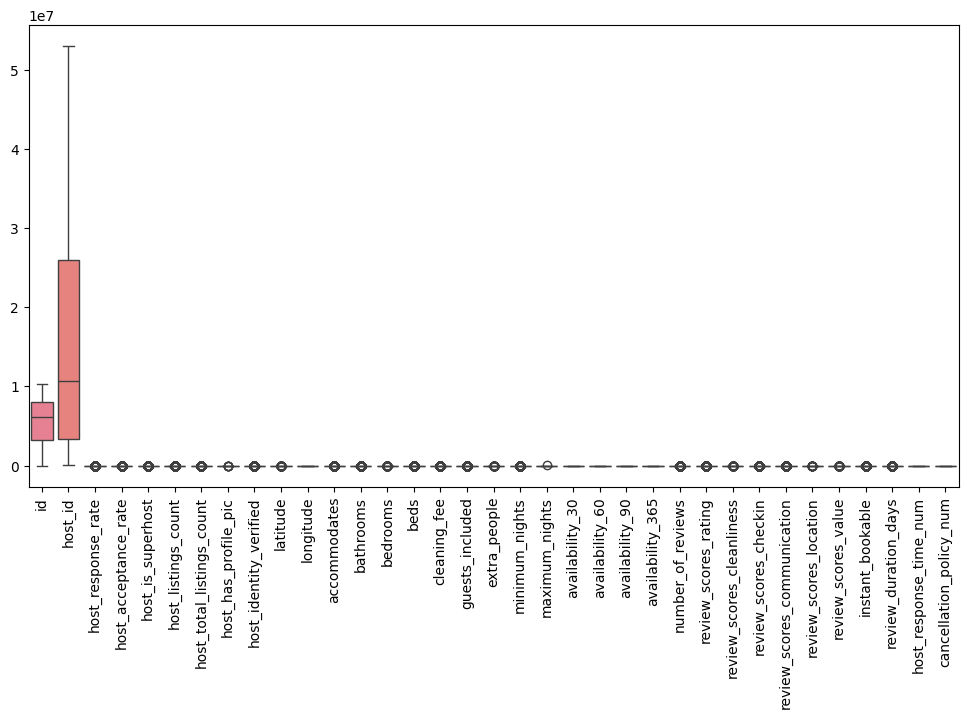

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.show()

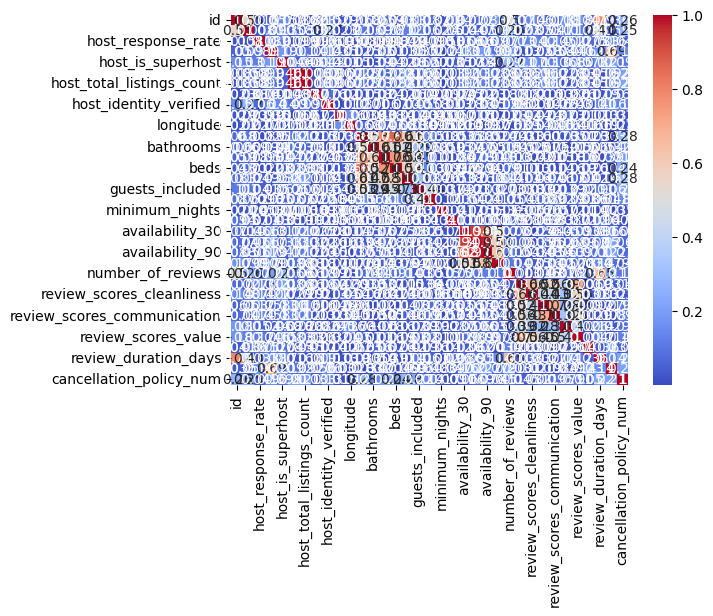

In [140]:
import numpy as np

corr_matrix = np.abs(X_train.corr())
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [141]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Performance:\nMAE: {mae_rf:.2f}\nRMSE: {rmse_rf:.2f}\nR² Score: {r2_rf:.2f}")


Random Forest Performance:
MAE: 33.43
RMSE: 54.18
R² Score: 0.64


In [142]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rf_cv = RandomizedSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

rf_cv.fit(X_train, y_train)
best_rf = rf_cv.best_estimator_

# Evaluate the best model
y_pred_best = best_rf.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned Random Forest Performance:\nMAE: {mae_best:.2f}\nRMSE: {rmse_best:.2f}\nR² Score: {r2_best:.2f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuned Random Forest Performance:
MAE: 32.98
RMSE: 53.06
R² Score: 0.65


In [143]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Performance:\nMAE: {mae_xgb:.2f}\nRMSE: {rmse_xgb:.2f}\nR² Score: {r2_xgb:.2f}")

XGBoost Performance:
MAE: 32.56
RMSE: 54.41
R² Score: 0.64


In [144]:
importances = best_rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False).head(10))


                 Feature  Importance
13              bedrooms    0.440829
11          accommodates    0.099030
12             bathrooms    0.071175
15          cleaning_fee    0.063054
9               latitude    0.061844
10             longitude    0.030323
23      availability_365    0.026454
1                host_id    0.025617
0                     id    0.018106
3   host_acceptance_rate    0.017717


In [145]:
from sklearn.ensemble import VotingRegressor

ensemble_model = VotingRegressor([('rf', best_rf), ('xgb', xgb)])
ensemble_model.fit(X_train, y_train)

y_pred_ensemble = ensemble_model.predict(X_test)

print(f"Ensemble Model Performance:\nMAE: {mean_absolute_error(y_test, y_pred_ensemble):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ensemble)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_ensemble):.2f}")


Ensemble Model Performance:
MAE: 32.04
RMSE: 52.63
R² Score: 0.66


In [146]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

stack_model = StackingRegressor(estimators=[('rf', best_rf), ('xgb', xgb)], final_estimator=Ridge())
stack_model.fit(X_train, y_train)

y_pred_stack = stack_model.predict(X_test)

print(f"Stacking Model Performance:\nMAE: {mean_absolute_error(y_test, y_pred_stack):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_stack)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_stack):.2f}")


Stacking Model Performance:
MAE: 31.78
RMSE: 52.72
R² Score: 0.66


100%|===================| 761/764 [00:52<00:00]       

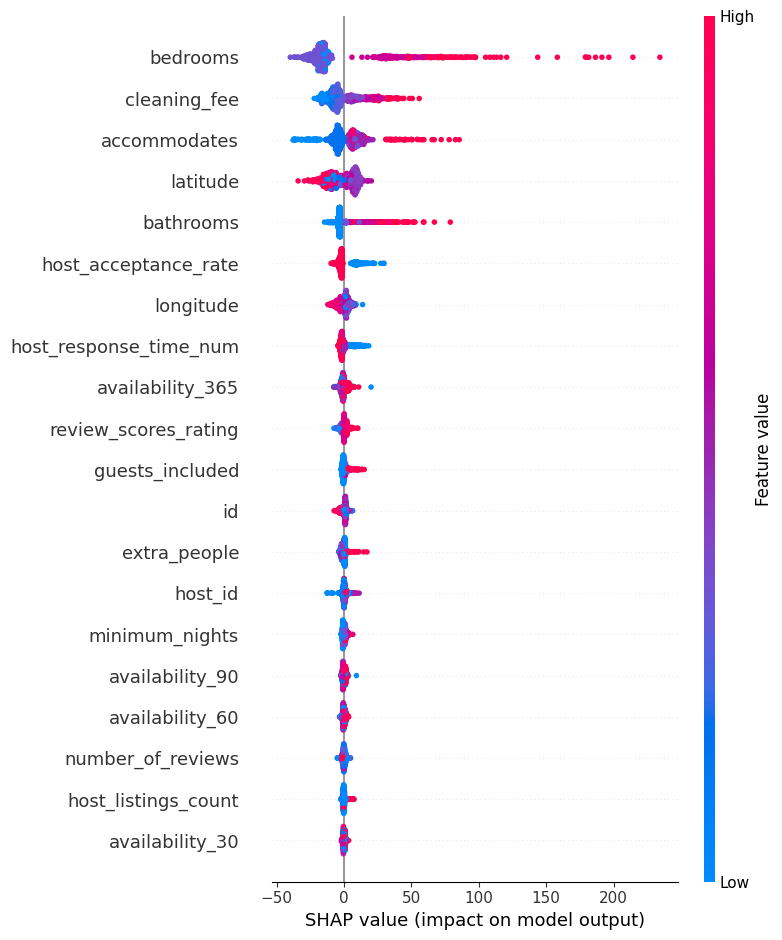

In [147]:
import shap

explainer_rf = shap.Explainer(best_rf, X_train)
shap_values_rf = explainer_rf(X_test, check_additivity=False)  # Disable additivity check
shap.summary_plot(shap_values_rf, X_test)


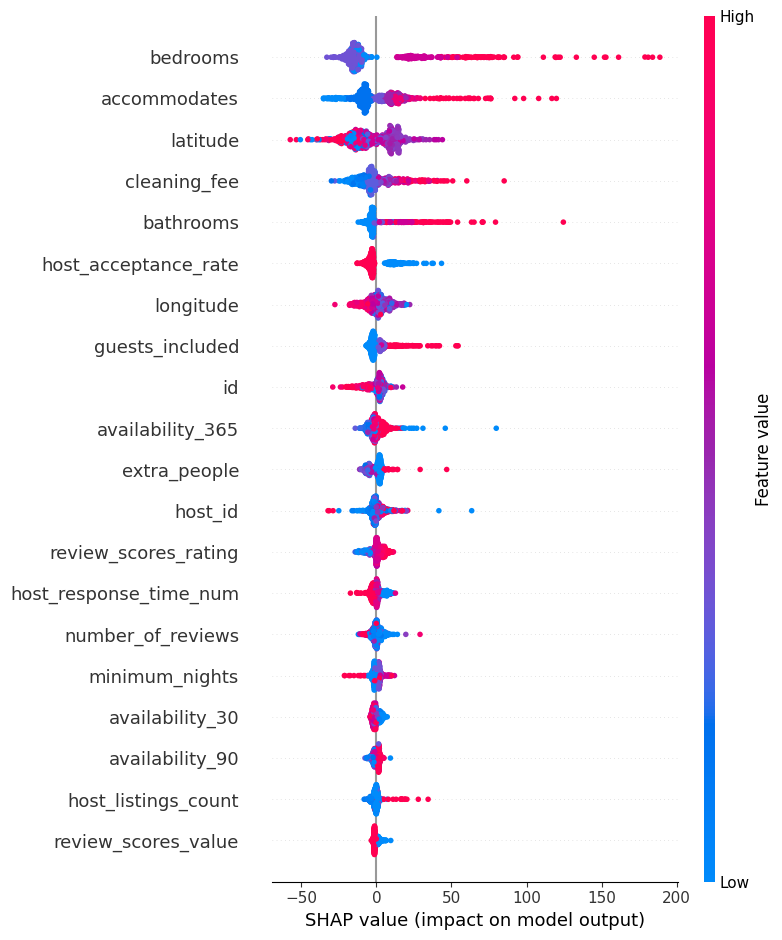

In [148]:
explainer_xgb = shap.Explainer(xgb, X_train)
shap_values_xgb = explainer_xgb(X_test)
shap.summary_plot(shap_values_xgb, X_test)


In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Evaluate Model Performance
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print Performance
print(f"Linear Regression Performance:")
print(f"Train - MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R² Score: {r2_train:.2f}")
print(f"Test  - MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R² Score: {r2_test:.2f}")


Linear Regression Performance:
Train - MAE: 37.83, RMSE: 60.59, R² Score: 0.55
Test  - MAE: 38.50, RMSE: 58.98, R² Score: 0.57


In [151]:
print(X_train.columns.tolist())


['id', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'review_duration_days', 'host_response_time_num', 'cancellation_policy_num']


In [154]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define numerical and categorical features
numerical_features = [
    "host_response_rate", "host_acceptance_rate", "accommodates", "bathrooms",
    "bedrooms", "cleaning_fee", "guests_included", "extra_people",
    "review_scores_rating", "review_scores_location", "review_scores_value",
    "instant_bookable"
]
categorical_features = ["room_type", "property_type"]


# Define target variable
target = "price"  # Adjust if needed

# Split data into train and test sets
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Dynamically Select Features Available in X_train 🔹
selected_features = numerical_features + [col for col in X_train.columns if col.startswith("room_type_") or col.startswith("property_type_")]

# 🔹 Ensure Only Available Features are Used 🔹
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_selected, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train_selected)
y_test_pred = lr_model.predict(X_test_selected)

# Evaluate Model Performance
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print Performance Metrics
print(f"Linear Regression Performance:")
print(f"Train - MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R² Score: {r2_train:.2f}")
print(f"Test  - MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R² Score: {r2_test:.2f}")

# Extract Coefficients & Intercept for the formula
coef_df = pd.DataFrame({'Feature': selected_features, 'Coefficient': lr_model.coef_})
intercept = lr_model.intercept_

# Display the regression formula
formula = f"Price = {intercept:.2f} " + " ".join(
    [f"+ ({coef:.2f} * {feature})" for feature, coef in zip(coef_df['Feature'], coef_df['Coefficient'])]
)
print("\nOptimized Linear Regression Formula:")
print(formula)


Linear Regression Performance:
Train - MAE: 38.23, RMSE: 61.07, R² Score: 0.54
Test  - MAE: 38.58, RMSE: 59.15, R² Score: 0.57

Optimized Linear Regression Formula:
Price = -85.79 + (-9.51 * host_response_rate) + (-31.08 * host_acceptance_rate) + (13.83 * accommodates) + (21.64 * bathrooms) + (15.13 * bedrooms) + (0.49 * cleaning_fee) + (3.04 * guests_included) + (0.14 * extra_people) + (1.02 * review_scores_rating) + (12.63 * review_scores_location) + (-10.37 * review_scores_value) + (1.70 * instant_bookable)


In [155]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define relevant features (excluding target variable)
categorical_features = ["room_type", "property_type"]
numerical_features = [
    "host_response_rate", "host_acceptance_rate", "accommodates", "bathrooms",
    "bedrooms", "cleaning_fee", "guests_included", "extra_people",
    "review_scores_rating", "review_scores_location", "review_scores_value",
    "instant_bookable"
]


# Define target variable
target = "price"  # Adjust if needed

# Splitting into training & testing sets
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dynamically select features (ensures encoded columns are correctly picked)
selected_features = numerical_features + [col for col in X_train.columns if col.startswith("room_type_") or col.startswith("property_type_")]

# Select only the valid features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_selected, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train_selected)
y_test_pred = lr_model.predict(X_test_selected)

# Evaluate Model Performance
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print Performance Metrics
print(f"Linear Regression Performance:")
print(f"Train - MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R² Score: {r2_train:.2f}")
print(f"Test  - MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R² Score: {r2_test:.2f}")

# Extract Coefficients & Intercept for the formula
coef_df = pd.DataFrame({'Feature': selected_features, 'Coefficient': lr_model.coef_})
intercept = lr_model.intercept_

# Display the regression formula
formula = f"Price = {intercept:.2f} " + " ".join(
    [f"+ ({coef:.2f} * {feature})" for feature, coef in zip(coef_df['Feature'], coef_df['Coefficient'])]
)
print("\nOptimized Linear Regression Formula:")
print(formula)


Linear Regression Performance:
Train - MAE: 38.23, RMSE: 61.07, R² Score: 0.54
Test  - MAE: 38.58, RMSE: 59.15, R² Score: 0.57

Optimized Linear Regression Formula:
Price = -85.79 + (-9.51 * host_response_rate) + (-31.08 * host_acceptance_rate) + (13.83 * accommodates) + (21.64 * bathrooms) + (15.13 * bedrooms) + (0.49 * cleaning_fee) + (3.04 * guests_included) + (0.14 * extra_people) + (1.02 * review_scores_rating) + (12.63 * review_scores_location) + (-10.37 * review_scores_value) + (1.70 * instant_bookable)


In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Define the most critical features for price prediction
selected_features = [
    "accommodates", "bathrooms", "bedrooms", "cleaning_fee",
    "review_scores_rating", "review_scores_location", "instant_bookable"
]

# Use only these selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_selected, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train_selected)
y_test_pred = lr_model.predict(X_test_selected)

# Evaluate Model Performance
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Print Performance
print(f"Test Performance - MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R² Score: {r2_test:.2f}")

# Extract Coefficients & Intercept for the formula
coef_df = pd.DataFrame({'Feature': selected_features, 'Coefficient': lr_model.coef_})
intercept = lr_model.intercept_

# Display the regression formula
formula = f"Price = {intercept:.2f} " + " ".join(
    [f"+ ({coef:.2f} * {feature})" for feature, coef in zip(coef_df['Feature'], coef_df['Coefficient'])]
)
print("\nSimplified Linear Regression Formula:")
print(formula)


Test Performance - MAE: 39.22, RMSE: 59.88, R² Score: 0.56

Simplified Linear Regression Formula:
Price = -122.56 + (14.30 * accommodates) + (21.71 * bathrooms) + (16.53 * bedrooms) + (0.51 * cleaning_fee) + (0.18 * review_scores_rating) + (11.08 * review_scores_location) + (-2.20 * instant_bookable)


In [157]:
# Calculate Mean of Actual Values
mean_actual = np.mean(y_test)

# Compute Prediction Accuracy
prediction_accuracy_linear = (1 - (mae_test / mean_actual)) * 100

# Print Accuracy
print(f"Linear Regression Prediction Accuracy: {prediction_accuracy_linear:.2f}%")


Linear Regression Prediction Accuracy: 68.93%


In [159]:
# Calculate Mean of Actual Values
mean_actual = np.mean(y_test)

# Compute Prediction Accuracy
prediction_accuracy_linear = (1 - (mae_test / mean_actual)) * 100

# Print Accuracy
print(f"Linear Regression Prediction Accuracy: {prediction_accuracy_linear:.2f}%")


Linear Regression Prediction Accuracy: 68.93%


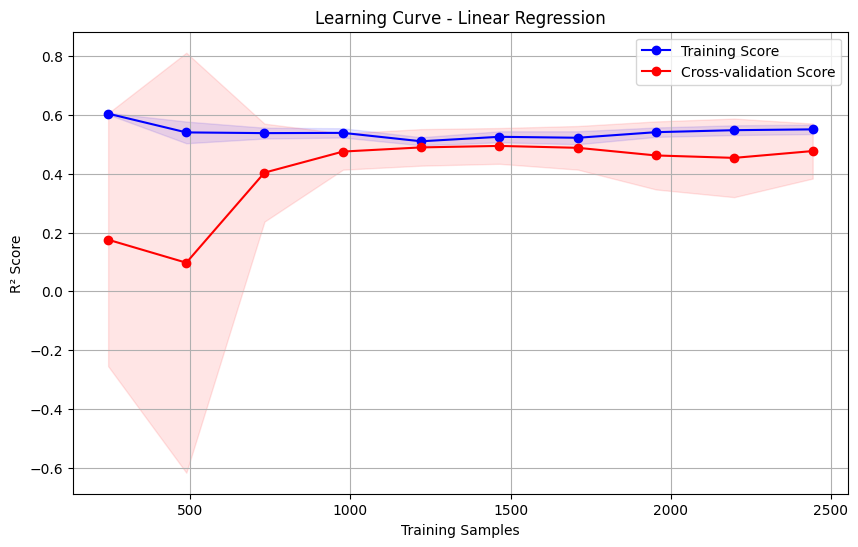

In [161]:
from sklearn.model_selection import learning_curve

# Generate Learning Curve Data
train_sizes, train_scores, test_scores = learning_curve(
    lr_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute Mean and Standard Deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="red", label="Cross-validation Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.1)

plt.xlabel("Training Samples")
plt.ylabel("R² Score")
plt.title("Learning Curve - Linear Regression")
plt.legend()
plt.grid()
plt.show()


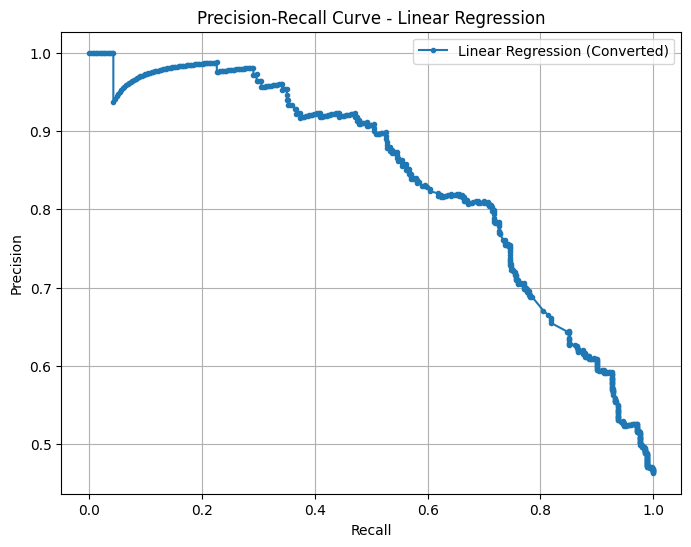

In [162]:
from sklearn.metrics import precision_recall_curve

# Convert Regression Output to Classification (Binary Problem)
threshold = np.median(y_train)  # Using median as threshold
y_test_class = (y_test > threshold).astype(int)
y_test_pred_class = (y_test_pred > threshold).astype(int)

# Compute Precision-Recall
precision, recall, _ = precision_recall_curve(y_test_class, y_test_pred)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label="Linear Regression (Converted)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Linear Regression")
plt.legend()
plt.grid()
plt.show()


In [163]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=200, min_samples_leaf=4, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate Model Performance
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Print Performance
print(f"Random Forest Performance:")
print(f"Train - MAE: {mae_train_rf:.2f}, RMSE: {rmse_train_rf:.2f}, R² Score: {r2_train_rf:.2f}")
print(f"Test  - MAE: {mae_test_rf:.2f}, RMSE: {rmse_test_rf:.2f}, R² Score: {r2_test_rf:.2f}")


Random Forest Performance:
Train - MAE: 19.19, RMSE: 37.33, R² Score: 0.83
Test  - MAE: 32.96, RMSE: 53.02, R² Score: 0.65


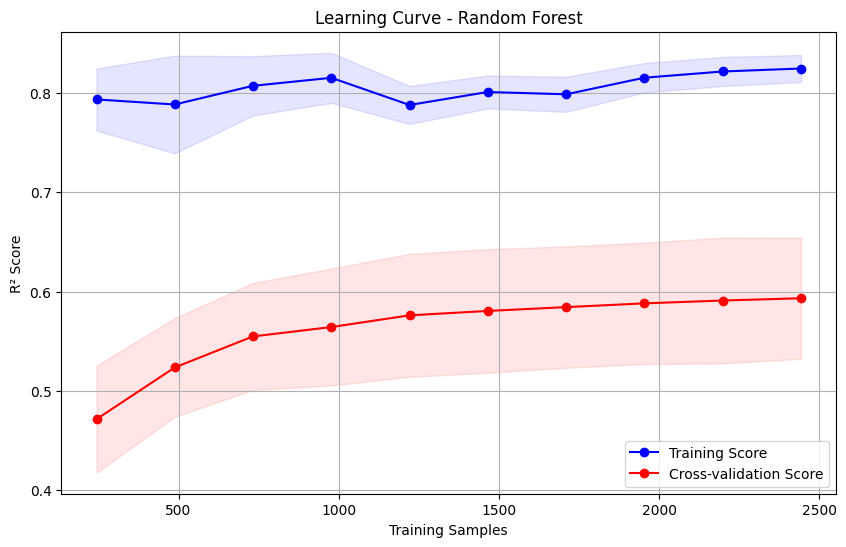

In [164]:
# Generate Learning Curve Data
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute Mean and Standard Deviation
train_mean_rf = np.mean(train_scores_rf, axis=1)
train_std_rf = np.std(train_scores_rf, axis=1)
test_mean_rf = np.mean(test_scores_rf, axis=1)
test_std_rf = np.std(test_scores_rf, axis=1)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rf, train_mean_rf, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes_rf, test_mean_rf, 'o-', color="red", label="Cross-validation Score")

plt.fill_between(train_sizes_rf, train_mean_rf - train_std_rf, train_mean_rf + train_std_rf, color="blue", alpha=0.1)
plt.fill_between(train_sizes_rf, test_mean_rf - test_std_rf, test_mean_rf + test_std_rf, color="red", alpha=0.1)

plt.xlabel("Training Samples")
plt.ylabel("R² Score")
plt.title("Learning Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()


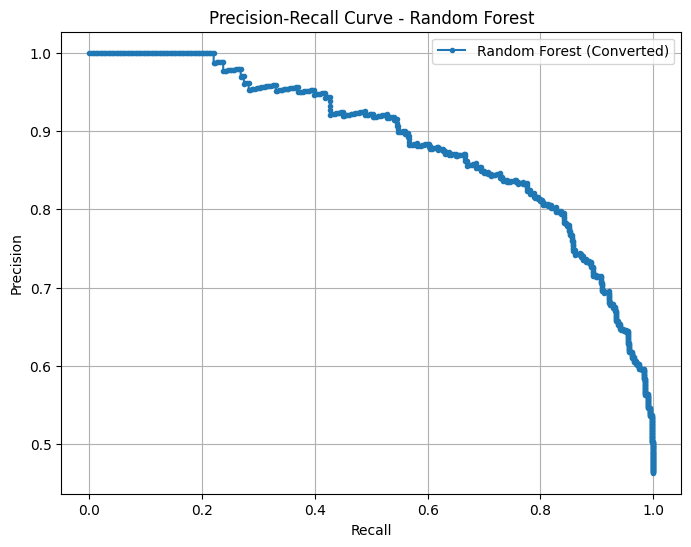

In [165]:
# Convert Regression Output to Classification (Using Median Threshold)
y_test_class_rf = (y_test > threshold).astype(int)
y_test_pred_class_rf = (y_test_pred_rf > threshold).astype(int)

# Compute Precision-Recall
precision_rf, recall_rf, _ = precision_recall_curve(y_test_class_rf, y_test_pred_rf)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, marker='.', label="Random Forest (Converted)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()



In [166]:
from sklearn.model_selection import GridSearchCV

# Define Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_leaf': [2, 4, 6],
    'max_depth': [10, 20, None]
}

# Grid Search for Hyperparameter Tuning
grid_search_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)

# Get Best Model
best_rf_model = grid_search_rf.best_estimator_


In [167]:
# Predictions
y_train_pred_tuned_rf = best_rf_model.predict(X_train)
y_test_pred_tuned_rf = best_rf_model.predict(X_test)

# Evaluate Performance
mae_train_tuned_rf = mean_absolute_error(y_train, y_train_pred_tuned_rf)
mae_test_tuned_rf = mean_absolute_error(y_test, y_test_pred_tuned_rf)
rmse_train_tuned_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_tuned_rf))
rmse_test_tuned_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned_rf))
r2_train_tuned_rf = r2_score(y_train, y_train_pred_tuned_rf)
r2_test_tuned_rf = r2_score(y_test, y_test_pred_tuned_rf)

# Print Performance
print(f"Tuned Random Forest Performance:")
print(f"Train - MAE: {mae_train_tuned_rf:.2f}, RMSE: {rmse_train_tuned_rf:.2f}, R² Score: {r2_train_tuned_rf:.2f}")
print(f"Test  - MAE: {mae_test_tuned_rf:.2f}, RMSE: {rmse_test_tuned_rf:.2f}, R² Score: {r2_test_tuned_rf:.2f}")


Tuned Random Forest Performance:
Train - MAE: 19.25, RMSE: 37.59, R² Score: 0.83
Test  - MAE: 33.12, RMSE: 53.18, R² Score: 0.65


In [168]:
# Calculate Mean of Actual Values
mean_actual = np.mean(y_test)

# Compute Prediction Accuracy
prediction_accuracy_tuned_rf = (1 - (mae_test_tuned_rf / mean_actual)) * 100

# Print Accuracy
print(f"Tuned Random Forest Prediction Accuracy: {prediction_accuracy_tuned_rf:.2f}%")


Tuned Random Forest Prediction Accuracy: 73.75%


In [ ]:
df.to_excel("cleaned_data_Final.xlsx", index=False)

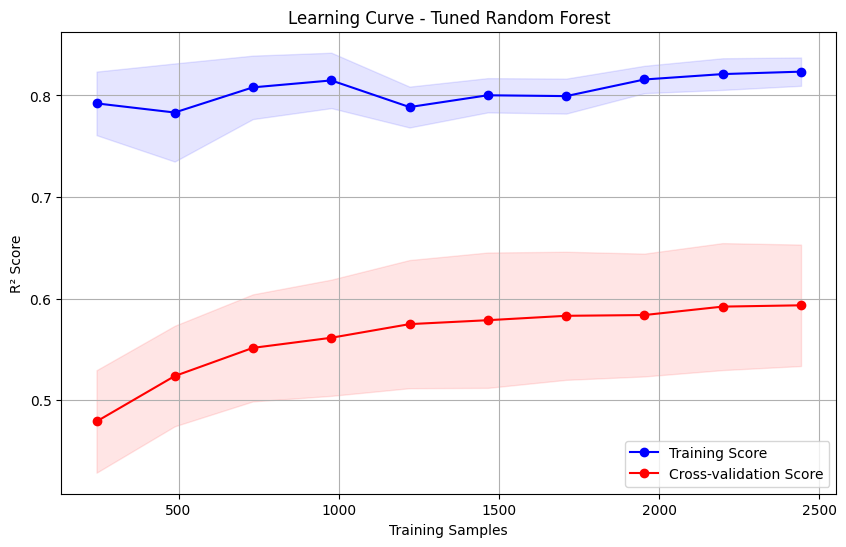

In [169]:
# Generate Learning Curve Data
train_sizes_tuned_rf, train_scores_tuned_rf, test_scores_tuned_rf = learning_curve(
    best_rf_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute Mean and Standard Deviation
train_mean_tuned_rf = np.mean(train_scores_tuned_rf, axis=1)
train_std_tuned_rf = np.std(train_scores_tuned_rf, axis=1)
test_mean_tuned_rf = np.mean(test_scores_tuned_rf, axis=1)
test_std_tuned_rf = np.std(test_scores_tuned_rf, axis=1)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_tuned_rf, train_mean_tuned_rf, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes_tuned_rf, test_mean_tuned_rf, 'o-', color="red", label="Cross-validation Score")

plt.fill_between(train_sizes_tuned_rf, train_mean_tuned_rf - train_std_tuned_rf, train_mean_tuned_rf + train_std_tuned_rf, color="blue", alpha=0.1)
plt.fill_between(train_sizes_tuned_rf, test_mean_tuned_rf - test_std_tuned_rf, test_mean_tuned_rf + test_std_tuned_rf, color="red", alpha=0.1)

plt.xlabel("Training Samples")
plt.ylabel("R² Score")
plt.title("Learning Curve - Tuned Random Forest")
plt.legend()
plt.grid()
plt.show()


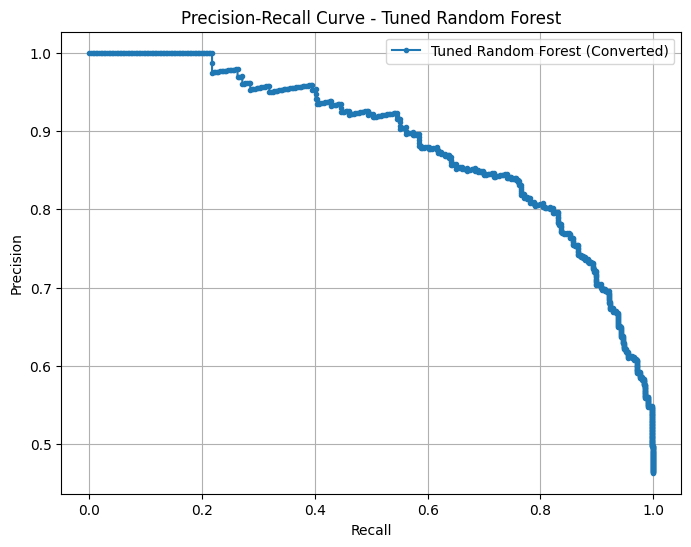

In [170]:
# Convert Regression Output to Classification (Using Median Threshold)
y_test_class_tuned_rf = (y_test > threshold).astype(int)
y_test_pred_class_tuned_rf = (y_test_pred_tuned_rf > threshold).astype(int)

# Compute Precision-Recall
precision_tuned_rf, recall_tuned_rf, _ = precision_recall_curve(y_test_class_tuned_rf, y_test_pred_tuned_rf)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_tuned_rf, precision_tuned_rf, marker='.', label="Tuned Random Forest (Converted)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Tuned Random Forest")
plt.legend()
plt.grid()
plt.show()


In [171]:
# Train a Random Forest on full features to get importance
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head(15))  # Show top 15 features


                   Feature  Importance
13                bedrooms    0.374301
11            accommodates    0.087586
12               bathrooms    0.069603
15            cleaning_fee    0.059084
9                 latitude    0.058864
1                  host_id    0.037057
23        availability_365    0.032102
10               longitude    0.031391
0                       id    0.023224
17            extra_people    0.022651
24       number_of_reviews    0.021009
3     host_acceptance_rate    0.017069
25    review_scores_rating    0.015505
33  host_response_time_num    0.013429
32    review_duration_days    0.013060


In [172]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions using the tuned RF model
y_pred = best_rf.predict(X_test_selected)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
accuracy = max(0, r2) * 100  # Approximate accuracy in percentage

# Print performance metrics
print(f"Tuned RF (Manual Feature Selection) Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Prediction Accuracy: {accuracy:.2f}%")


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- availability_30
- availability_365
- availability_60
- availability_90
- beds
- ...


In [ ]:

# Initialize SHAP explainer with the tuned Random Forest model
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test)
